# Titanic Data Analysis

# Contents

Overview
1. Importing all the libraries necessary for this project
2. Load Data from CSVs
3. Fixing NaN data values
    1. Explanation: Why median is considered ro replace NaN values in column "Age"?
4. Data Analysis
    1. Percentage Deaths and Survivors
    2. Female - Male -- Deaths and Survivors
    3. Age of Passengers
    4. Number of Passengers Traveling with their Sibling/Spouse
    5. Number of Passengers traveling with their Parents/Children
    6. Number of Passengers Traveling in Different Socio-Economic Classes
    7. Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors
    8. Distribution of Pclass and Cabin
    9. Box Plot of Survivors from Pclass 1, 2 nad 3
    10. Distribution of Survivors with respect to Embarkment
    11. Number of Passengers that Died and Survived with respect to the Fare
5. Prediction Algorithms
    1. Make data appropriate for Training and Testing
    2. Splitting up data into 80% train data and 20% test data
    3. Random Forest Classification Algorithm - Implementation and Results
    4. Linear Discrimination Analysis - Implementation and Results
6. Conclusion

## Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data Dictionary

* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
( Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

## 1] Importing all the libraries necessary for this project

In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import os 
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2]  Load Data from CSVs

In [2]:
# Creating the INPUT FOLDER which will contain our input files!
INPUT_FOLDER='/Users/as186194/Documents/DOCUMENTS/TRIALS/Kaggle/Kaggle_Titanic/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
   if 'zip' not in f:
      print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
.DS_Store                     6.15 KB
.ipynb_checkpoints            0.07 KB
titanic-data-analysis.html    1109.95 KB
titanic-data-analysis.ipynb   834.74 KB
Titanic.html                  792.18 KB
Titanic.ipynb                 529.48 KB
titanic_train.csv             61.19 KB


In [3]:
main_file = pd.read_csv(INPUT_FOLDER + 'titanic_train.csv')

In [4]:
# Head of the dataset
main_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Description of the main_file
main_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3] Fixing NaN data values

In [6]:
# Find length of NaN values in Age
len(np.argwhere(np.isnan(main_file["Age"])))

177

In [7]:
# Find length of the column "Age"
len(main_file["Age"])

891

In [8]:
# View the NaN in Age for Female-Sex
female_age = main_file[main_file["Sex"] == "female"]["Age"]

In [9]:
female_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
10      4.0
11     58.0
14     14.0
15     55.0
18     31.0
19      NaN
22     15.0
24      8.0
25     38.0
28      NaN
31      NaN
32      NaN
38     18.0
39     14.0
40     40.0
41     27.0
43      3.0
44     19.0
47      NaN
49     18.0
52     49.0
53     29.0
56     21.0
58      5.0
61     38.0
       ... 
807    18.0
809    33.0
813     6.0
816    23.0
820    52.0
823    27.0
829    62.0
830    15.0
835    39.0
842    30.0
849     NaN
852     9.0
853    16.0
854    44.0
855    18.0
856    45.0
858    24.0
862    48.0
863     NaN
865    42.0
866    27.0
871    47.0
874    28.0
875    15.0
879    56.0
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64

In [10]:
# View the NaN in Age for Male-Sex
male_age = main_file[main_file["Sex"] == "male"]["Age"] 

In [11]:
male_age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
12     20.0
13     39.0
16      2.0
17      NaN
20     35.0
21     34.0
23     28.0
26      NaN
27     19.0
29      NaN
30     40.0
33     66.0
34     28.0
35     42.0
36      NaN
37     21.0
42      NaN
45      NaN
46      NaN
48      NaN
50      7.0
51     21.0
54     65.0
55      NaN
57     28.5
       ... 
840    20.0
841    16.0
843    34.5
844    17.0
845    42.0
846     NaN
847    35.0
848    28.0
850     4.0
851    74.0
857    51.0
859     NaN
860    41.0
861    21.0
864    24.0
867    31.0
868     NaN
869     4.0
870    26.0
872    33.0
873    47.0
876    20.0
877    19.0
878     NaN
881    33.0
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

In [12]:
# Store median value into variable
female_median = female_age.median()
male_median = male_age.median()

In [13]:
# Assign age and sex into lists
age = list(main_file["Age"])
sex = list(main_file["Sex"])

In [14]:
# Run loop to replace the NaN values with the median value of the column
# The NaN values in female ages are replaced by the median of the female ages
# The NaN values in male ages are replaced by the median of the male ages

for i in range (len(age)):
    if (math.isnan(age[i]) and sex[i] == "male"):
        age[i] = male_median
        
    elif (math.isnan(age[i]) and sex[i] == "female"):
        age[i] = female_median

In [15]:
# Replace the Age and Sex columns with new updated ones without NaNs
(main_file["Age"]) = age
(main_file["Sex"]) = sex

In [16]:
# View the updated Age of female-Sex
main_file[main_file["Sex"] == "female"]["Age"]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
10      4.0
11     58.0
14     14.0
15     55.0
18     31.0
19     27.0
22     15.0
24      8.0
25     38.0
28     27.0
31     27.0
32     27.0
38     18.0
39     14.0
40     40.0
41     27.0
43      3.0
44     19.0
47     27.0
49     18.0
52     49.0
53     29.0
56     21.0
58      5.0
61     38.0
       ... 
807    18.0
809    33.0
813     6.0
816    23.0
820    52.0
823    27.0
829    62.0
830    15.0
835    39.0
842    30.0
849    27.0
852     9.0
853    16.0
854    44.0
855    18.0
856    45.0
858    24.0
862    48.0
863    27.0
865    42.0
866    27.0
871    47.0
874    28.0
875    15.0
879    56.0
880    25.0
882    22.0
885    39.0
887    19.0
888    27.0
Name: Age, Length: 314, dtype: float64

In [17]:
# View the updated Age of male-Sex
main_file[main_file["Sex"] == "male"]["Age"]

0      22.0
4      35.0
5      29.0
6      54.0
7       2.0
12     20.0
13     39.0
16      2.0
17     29.0
20     35.0
21     34.0
23     28.0
26     29.0
27     19.0
29     29.0
30     40.0
33     66.0
34     28.0
35     42.0
36     29.0
37     21.0
42     29.0
45     29.0
46     29.0
48     29.0
50      7.0
51     21.0
54     65.0
55     29.0
57     28.5
       ... 
840    20.0
841    16.0
843    34.5
844    17.0
845    42.0
846    29.0
847    35.0
848    28.0
850     4.0
851    74.0
857    51.0
859    29.0
860    41.0
861    21.0
864    24.0
867    31.0
868    29.0
869     4.0
870    26.0
872    33.0
873    47.0
876    20.0
877    19.0
878    29.0
881    33.0
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

### A] Explanation: Why median is considered ro replace NaN values in column "Age"?

177 values out of 891 values are missing or NaN fot the column "Age".

That is almost 20% of the values that are missing or NaN.

This percentage is not small but it's rather not too big either. 

The NaN values have been replaced with the median of the age values present in the column. 
This is one of the ways to handle missing-at-random data, although note that it gives a different answer.

Replacing the NaN values with the median seems justfifiable as 20% is not too large nor too small.
Also, the median age for male and median age for female have seperately be found and replaced keeping Sex in mind. This is definitely better than replacing the all the NaN values by one single value of median of all present ages.

The NaN values are not replaced by the mode as 20% could be a lot to replace by the most occuring value and this might not do justice to the column Age. 

## 4] Data Analysis

### A] Percentage Deaths and Survivors

In [18]:
# Total number of passengers
no_of_passengers = main_file.groupby("Survived").size()

In [19]:
no_of_passengers

Survived
0    549
1    342
dtype: int64

In [20]:
# Total number of survivors
no_of_survivors = no_of_passengers[1]

In [21]:
no_of_survivors

342

In [22]:
# Total number of deaths
no_of_deaths = no_of_passengers[0]

In [23]:
no_of_deaths

549

In [24]:
# Percentage of total survivors and deaths
percent_of_survivors = (no_of_survivors/(no_of_survivors + no_of_deaths))*100
percent_of_deaths = (no_of_deaths/(no_of_survivors + no_of_deaths))*100

In [25]:
percent_of_survivors

38.383838383838381

In [26]:
percent_of_deaths

61.616161616161612

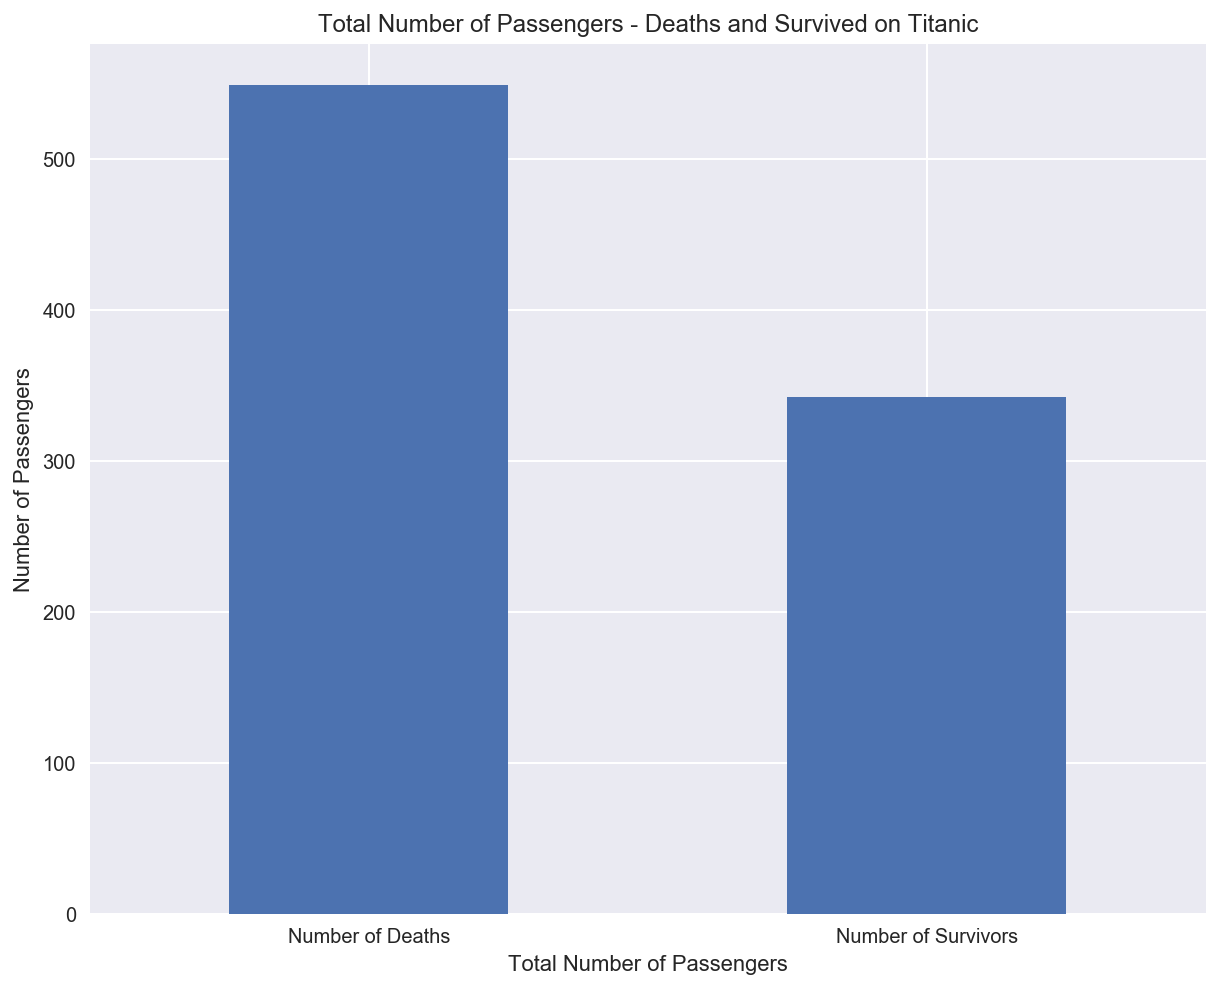

In [27]:
# Plot bar graph for Total Number of Passengers - Deaths and Survived

objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
no_of_passengers.plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.show()

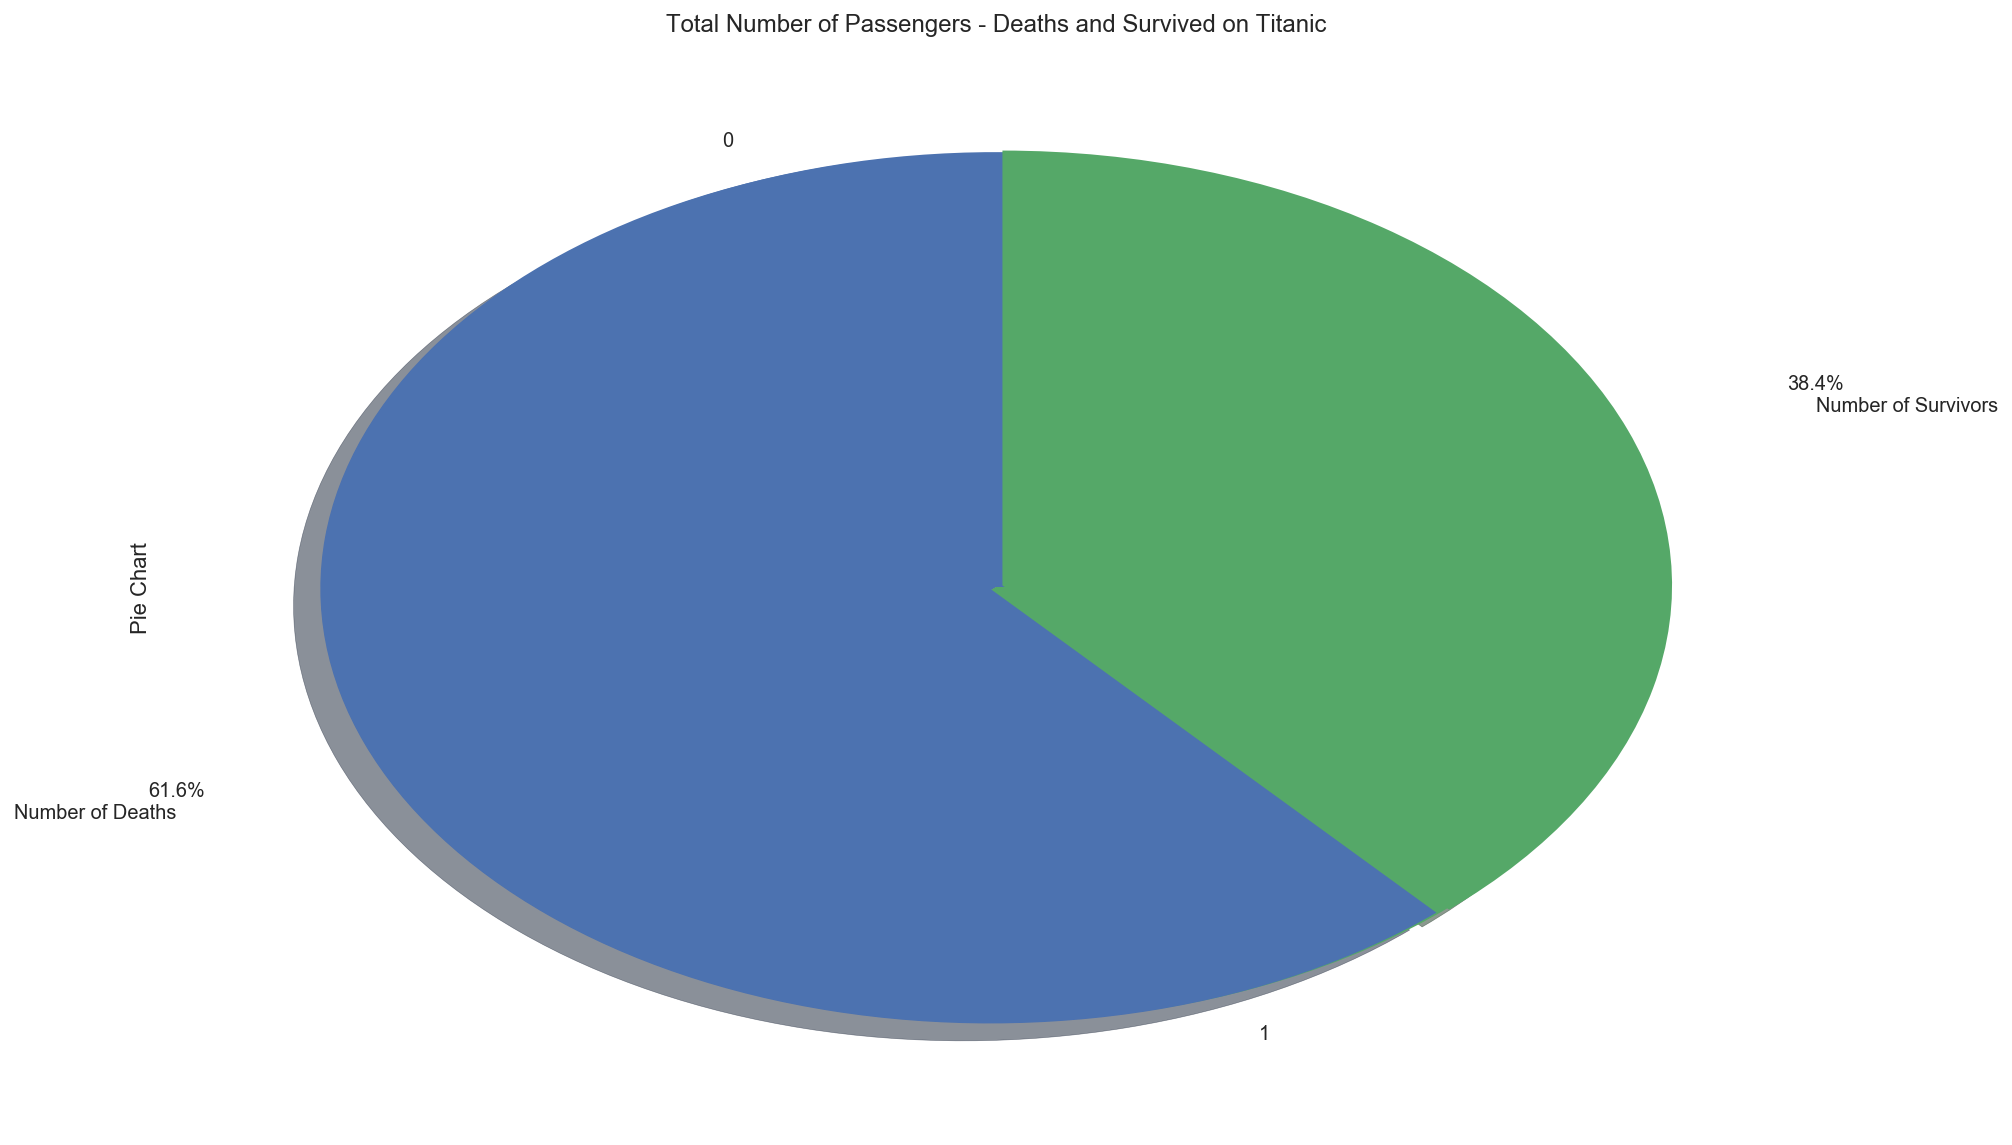

In [28]:
# Plot pie chart for Total Number of Passenger Deaths and Survived

no_of_passengers.plot(kind = "pie", figsize=(15,10))
labels = '\n\nNumber of Deaths', '\n\nNumber of Survivors'
explode = (0.01, 0.01)
plt.pie(no_of_passengers, autopct='%1.1f%%', pctdistance=1.3, labeldistance=1.3, explode=explode, labels=labels,
        shadow=True, startangle=90)
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.ylabel("Pie Chart")
plt.show()

### Analysis - 
It can be analyzed that 

Total Percentage of Number of Deaths = 61.61%

Total Percentage of Number of Survivors = 38.38%

### B] Female - Male -- Deaths and Survivors

In [29]:
male_female = main_file.groupby("Sex").size()

In [30]:
male_female

Sex
female    314
male      577
dtype: int64

In [31]:
# View number of females and males deaths and survived
survived_male_female = main_file.groupby(("Sex","Survived")).size()

In [32]:
survived_male_female

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

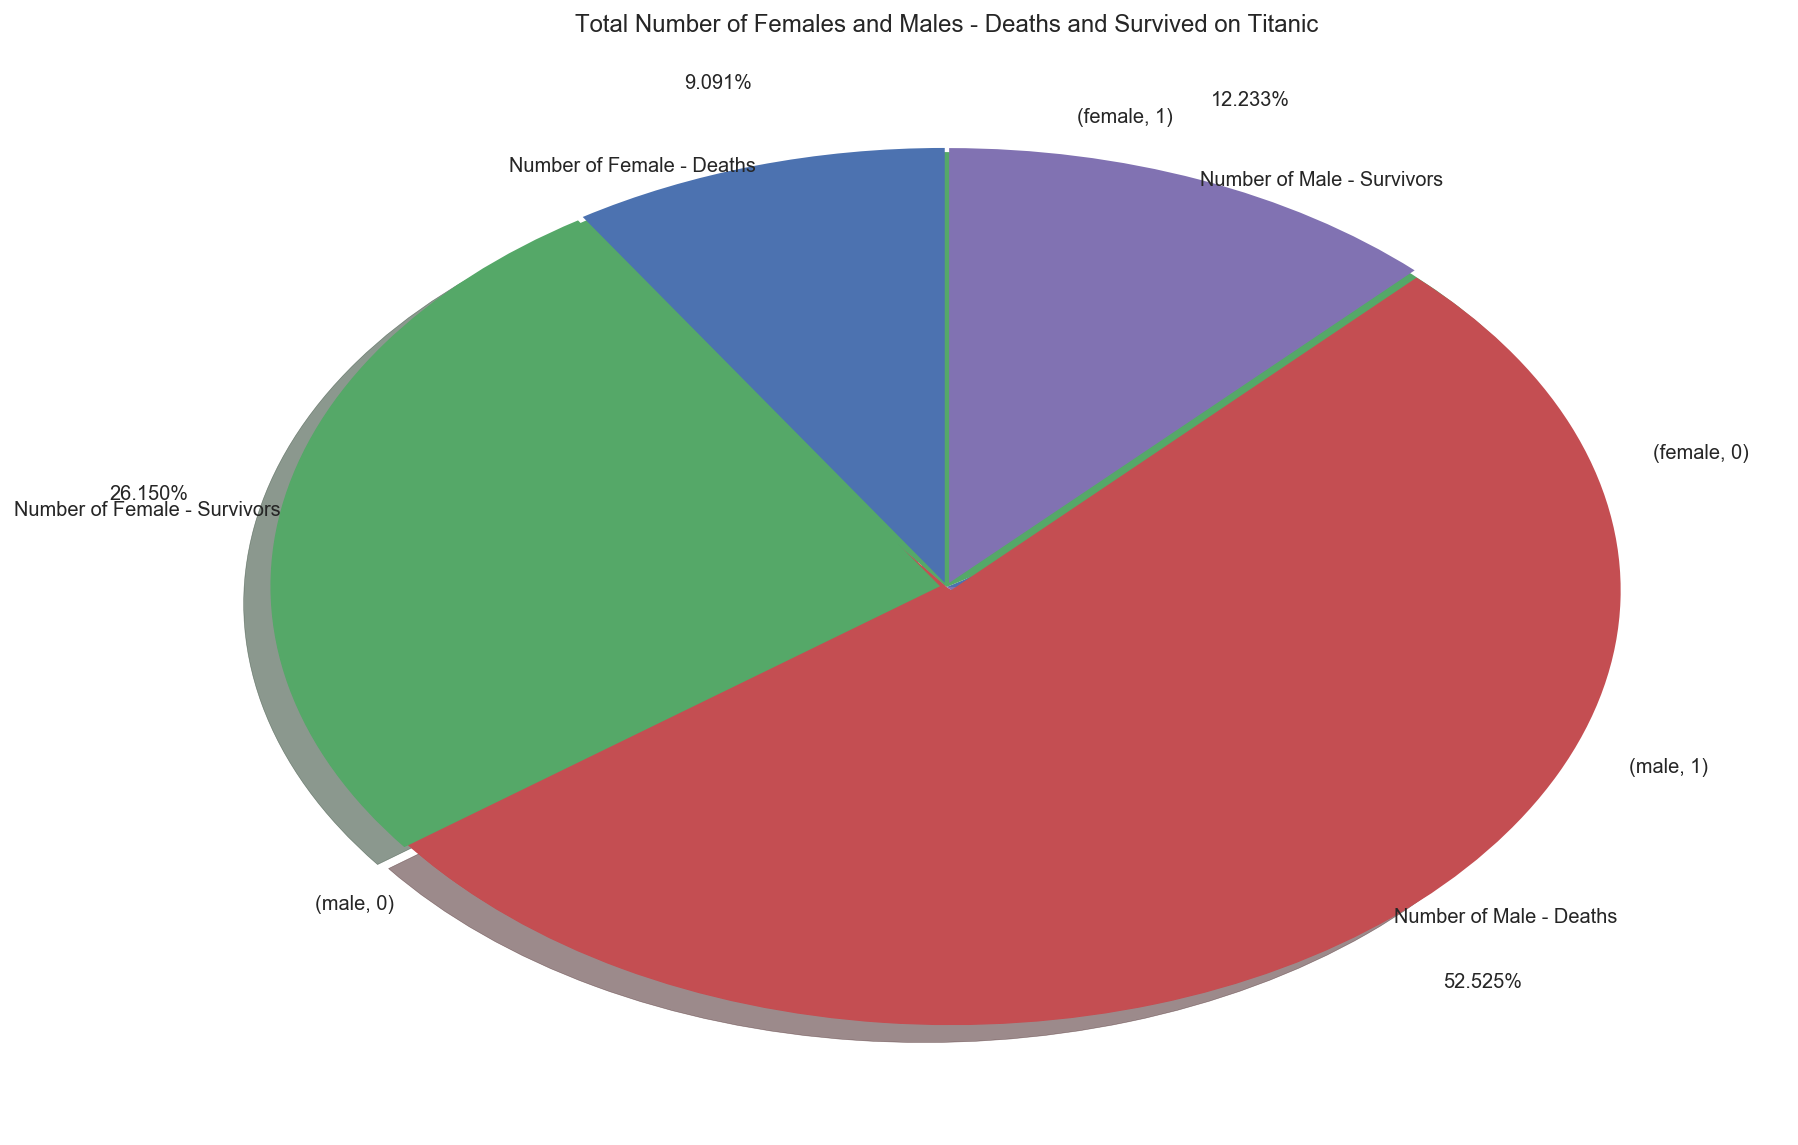

In [35]:
## Plot pie chart for Total Number of Females and Males - Deaths and Survived
survived_male_female.plot(kind = "pie", figsize=(15,10))
labels = 'Number of Female - Deaths', 'Number of Female - Survivors', 'Number of Male - Deaths', 'Number of Male - Survivors'
explode = (0.01, 0.01, 0.01, 0.01)
plt.title("Total Number of Females and Males - Deaths and Survived on Titanic")
plt.ylabel("")
plt.pie(survived_male_female, autopct='%1.3f%%', pctdistance=1.2, labeldistance=1, explode=explode, labels=labels,
        shadow=True, startangle=90)
plt.show()

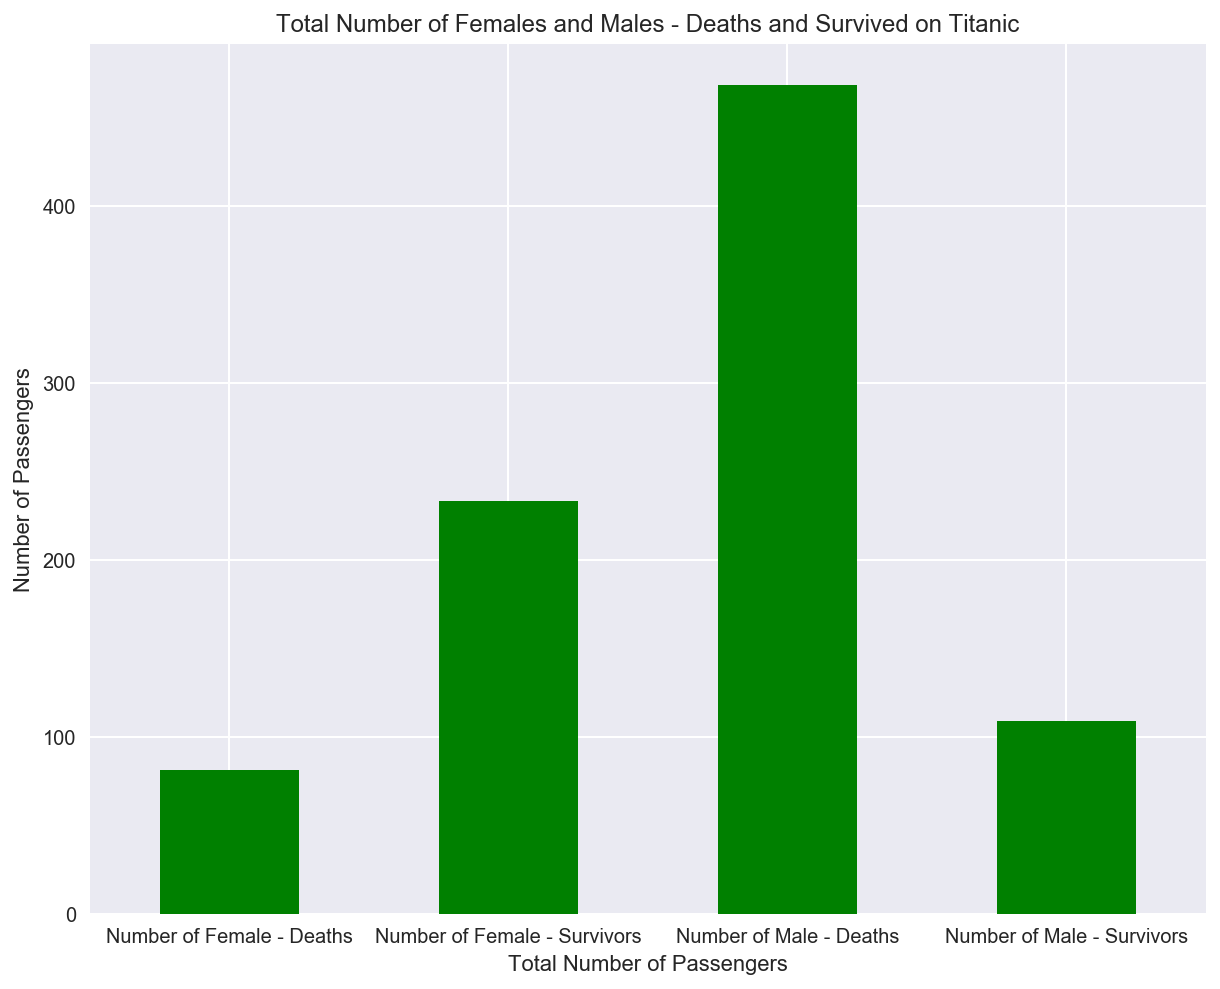

In [36]:
objects = ('Number of Female - Deaths', 'Number of Female - Survivors', 'Number of Male - Deaths', 'Number of Male - Survivors')
bars = np.arange(len(objects))
survived_male_female.plot(kind = "bar", figsize = (10,8), color = 'g')
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Females and Males - Deaths and Survived on Titanic")
plt.show()

In [37]:
print ("Percent of Female Passengers Survived:\t{}".format((survived_male_female["female"][1]/male_female["female"])*100))
print ("Percent of Male Passengers Survived:\t{}".format((survived_male_female["male"][1]/male_female["male"])*100))

Percent of Female Passengers Survived:	74.20382165605095
Percent of Male Passengers Survived:	18.890814558058924


### Analysis - 
It can be analyzed that 

Percent of Female Passengers Survived:	74.20%

Percent of Male Passengers Survived:	18.89%

### C] Age of Passengers

In [38]:
age_of_passengers = main_file.groupby("Age").size()

In [39]:
age_of_passengers

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Length: 88, dtype: int64

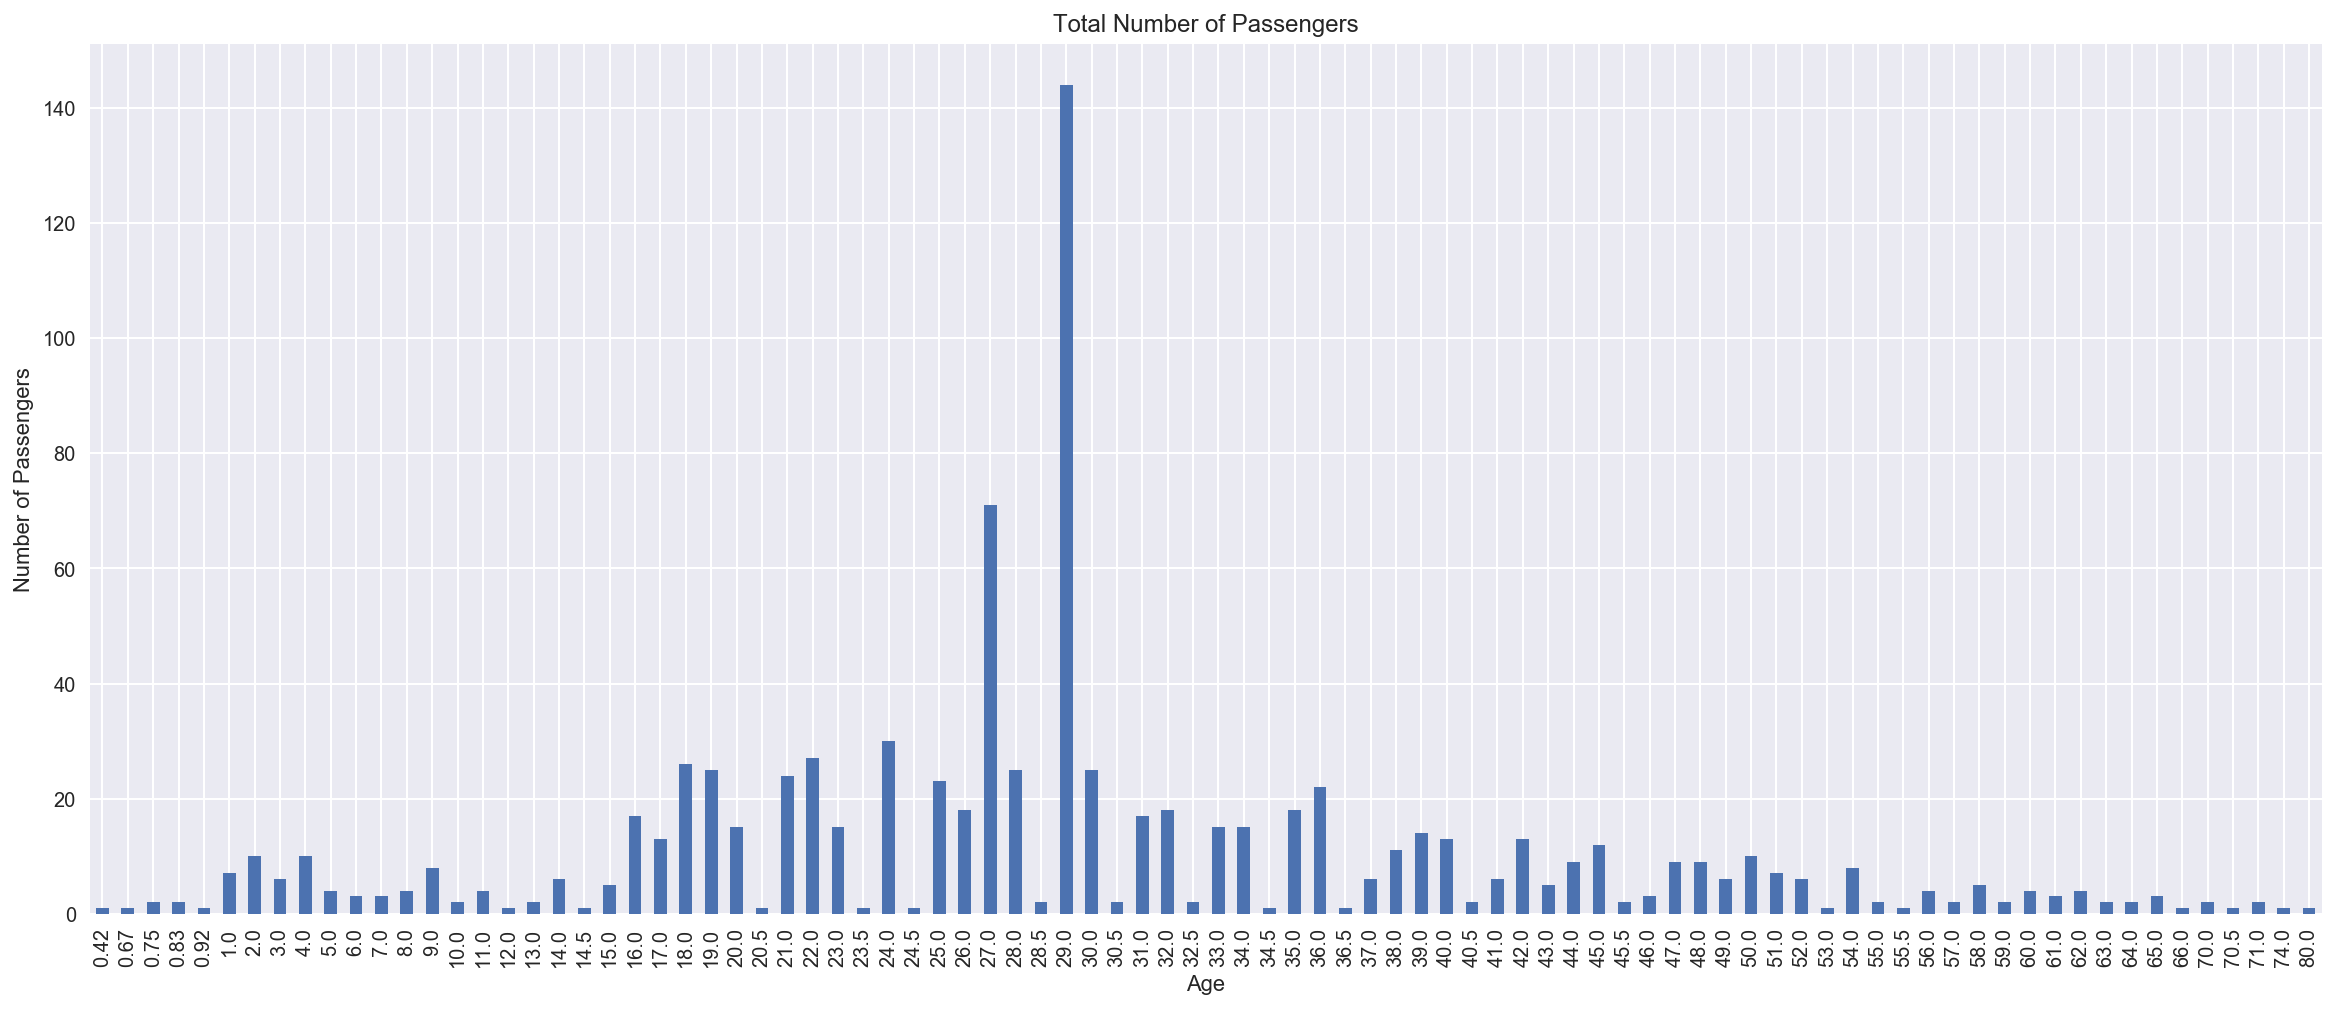

In [40]:
age_of_passengers.plot(kind = "bar", figsize = (20,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.title("Total Number of Passengers")
plt.show()

In [41]:
main_file["Age"].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Analysis - 
It can be analyzed that 

The Age of Passengers is a Normal Distribution 
with a mean of 29.44. 

### D] Number of Passengers Traveling with their Sibling/Spouse

In [43]:
sibsp = main_file.groupby("SibSp").size()

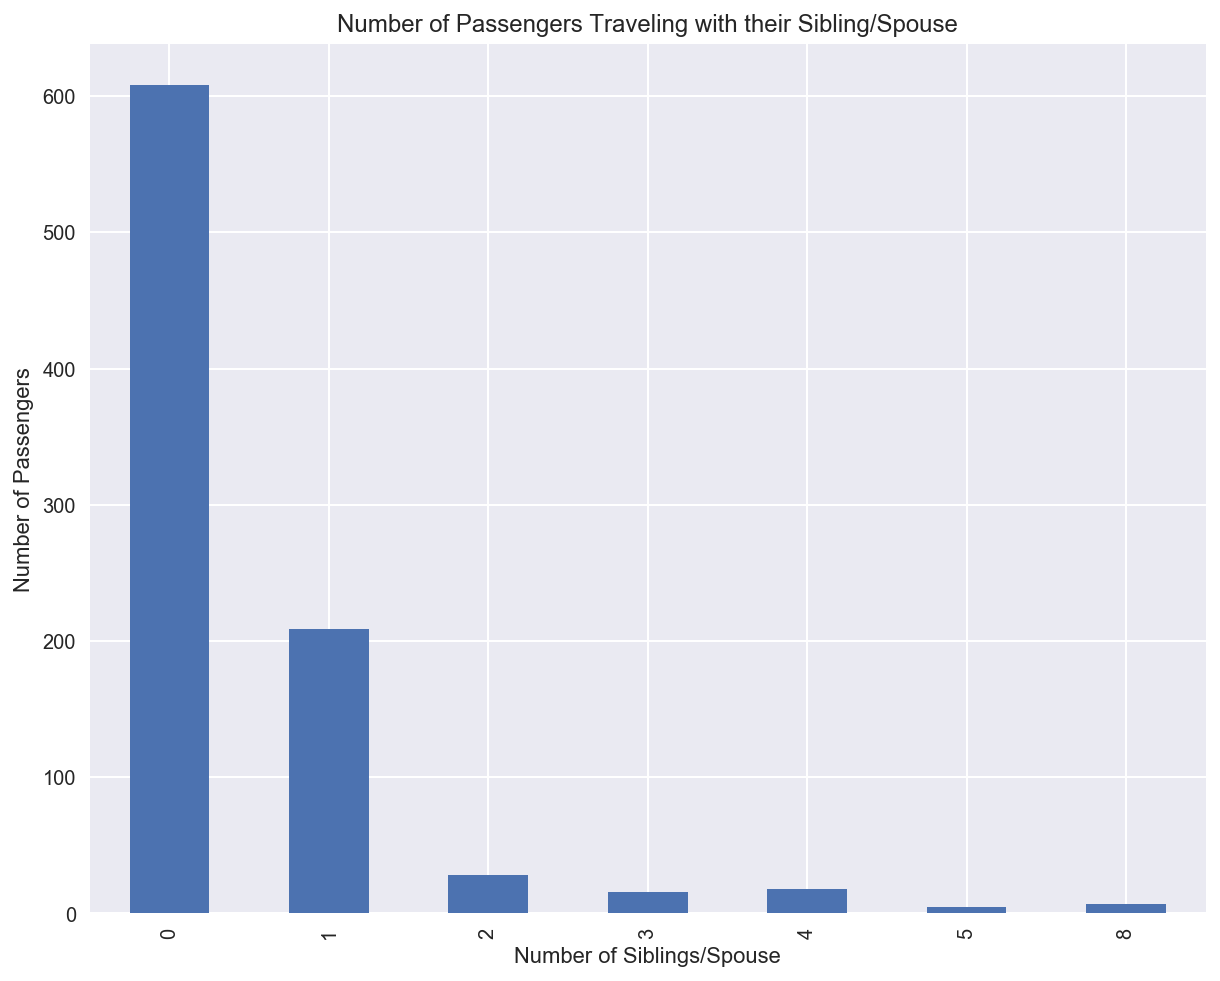

In [44]:
sibsp.plot(kind = "bar", figsize = (10,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Siblings/Spouse")
plt.title("Number of Passengers Traveling with their Sibling/Spouse")
plt.show()

### Analysis - 
It can be analyzed that 

Maximum passengers onboard Titanic, were not with their sibling or spouse. 

### E] Number of Passengers traveling with their Parents/Children

In [45]:
parch = main_file.groupby("Parch").size()

In [46]:
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

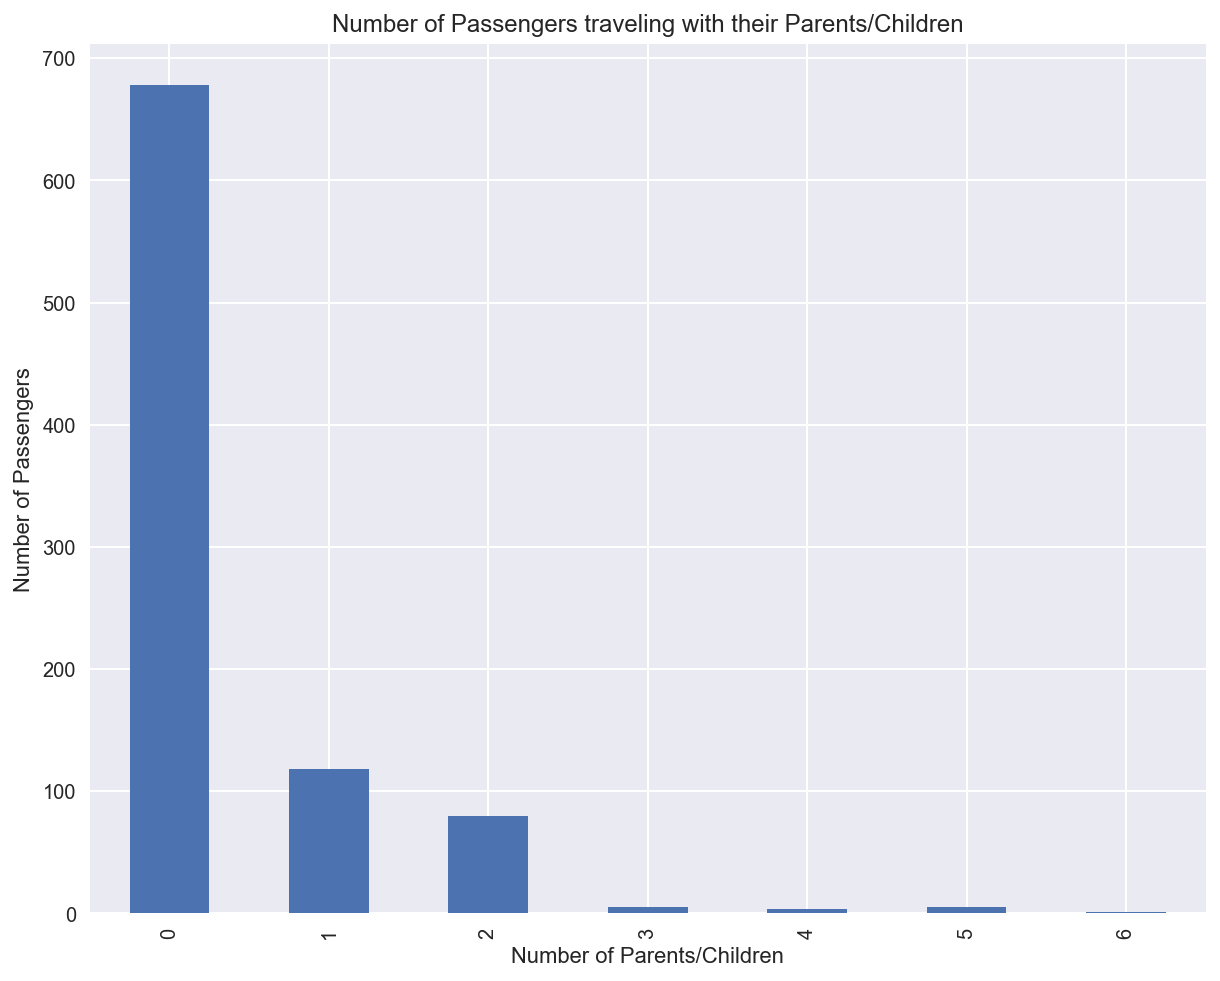

In [47]:
parch.plot(kind = "bar", figsize = (10,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Parents/Children")
plt.title("Number of Passengers traveling with their Parents/Children")
plt.show()

### Analysis - 
It can be analyzed that 

Maximum passengers onboard Titanic, were not with their parents or children. 

### F] Number of Passengers Traveling in Different Socio-Economic Classes

In [48]:
pclass = main_file.groupby("Pclass").size()

In [49]:
pclass

Pclass
1    216
2    184
3    491
dtype: int64

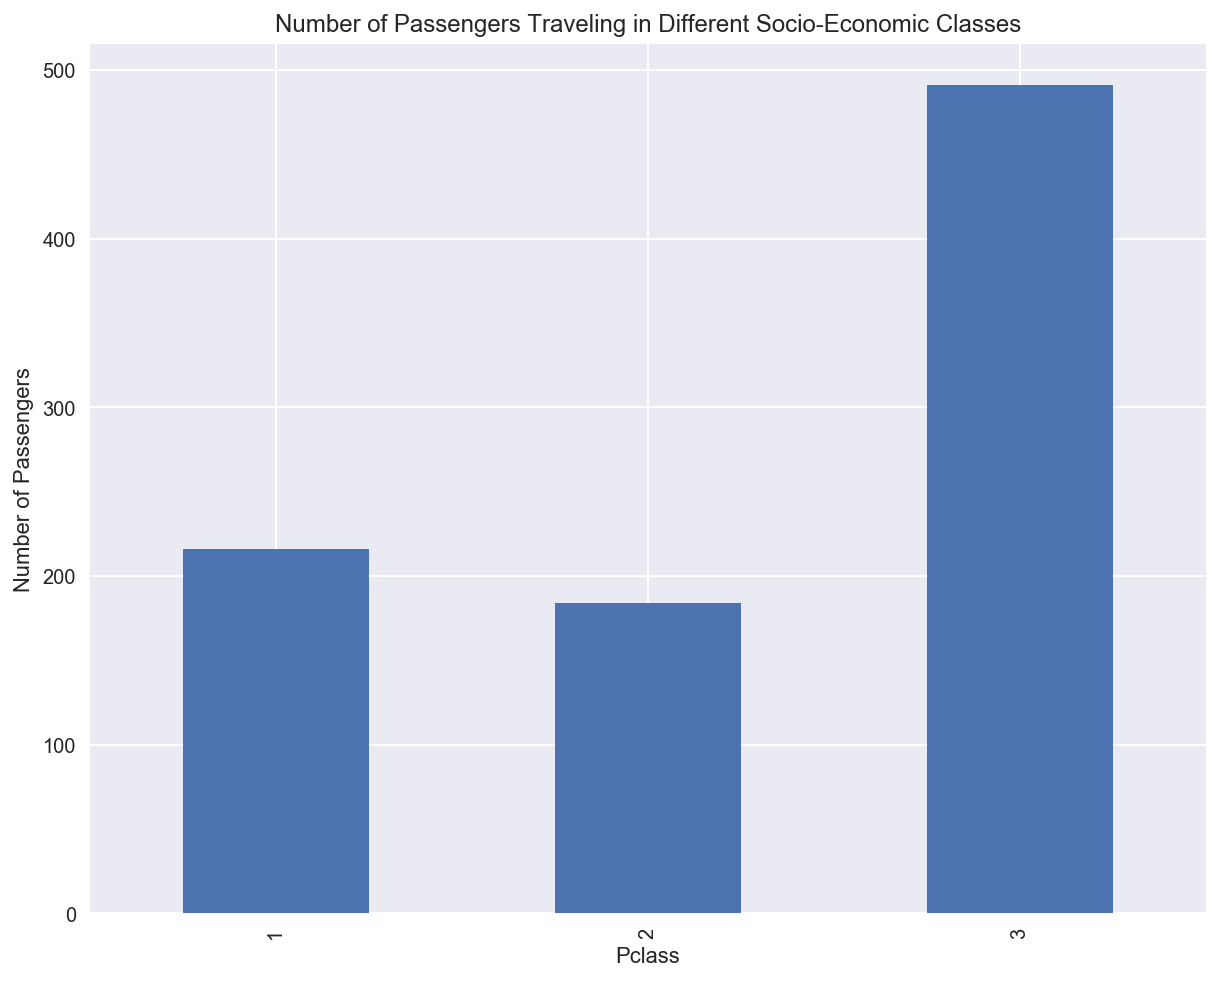

In [50]:
pclass.plot(kind = "bar", figsize = (10,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass")
plt.title("Number of Passengers Traveling in Different Socio-Economic Classes")
plt.show()

### Analysis - 
It can be analyzed that 

Majority passengers onboard Titanic, were traveling in Class 3. 

### G] Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

In [51]:
class_survived = main_file.groupby(("Pclass","Survived")).size()

In [52]:
class_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

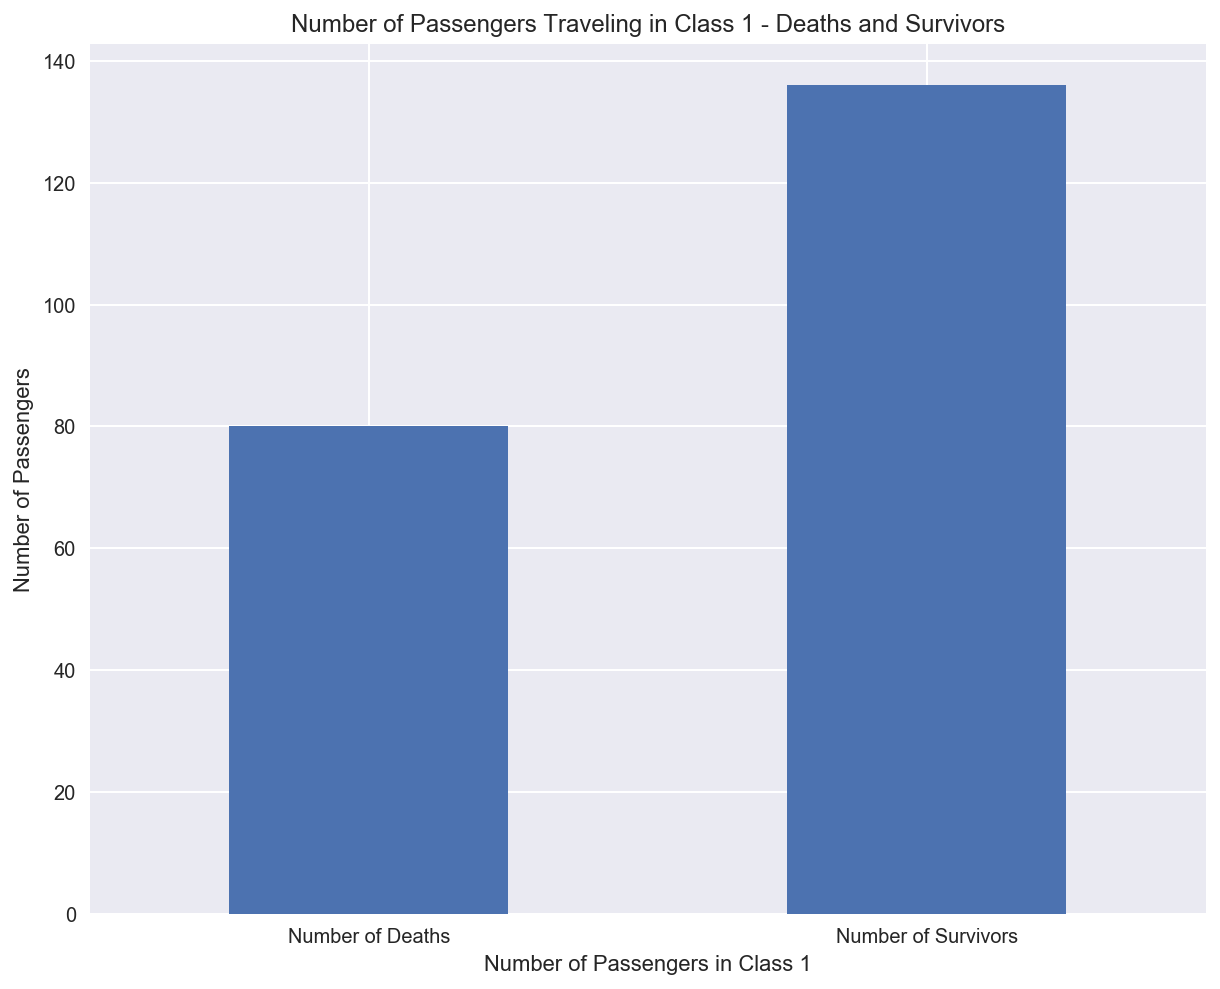

In [53]:
objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
class_survived[1].plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Class 1")
plt.title("Number of Passengers Traveling in Class 1 - Deaths and Survivors")
plt.show()

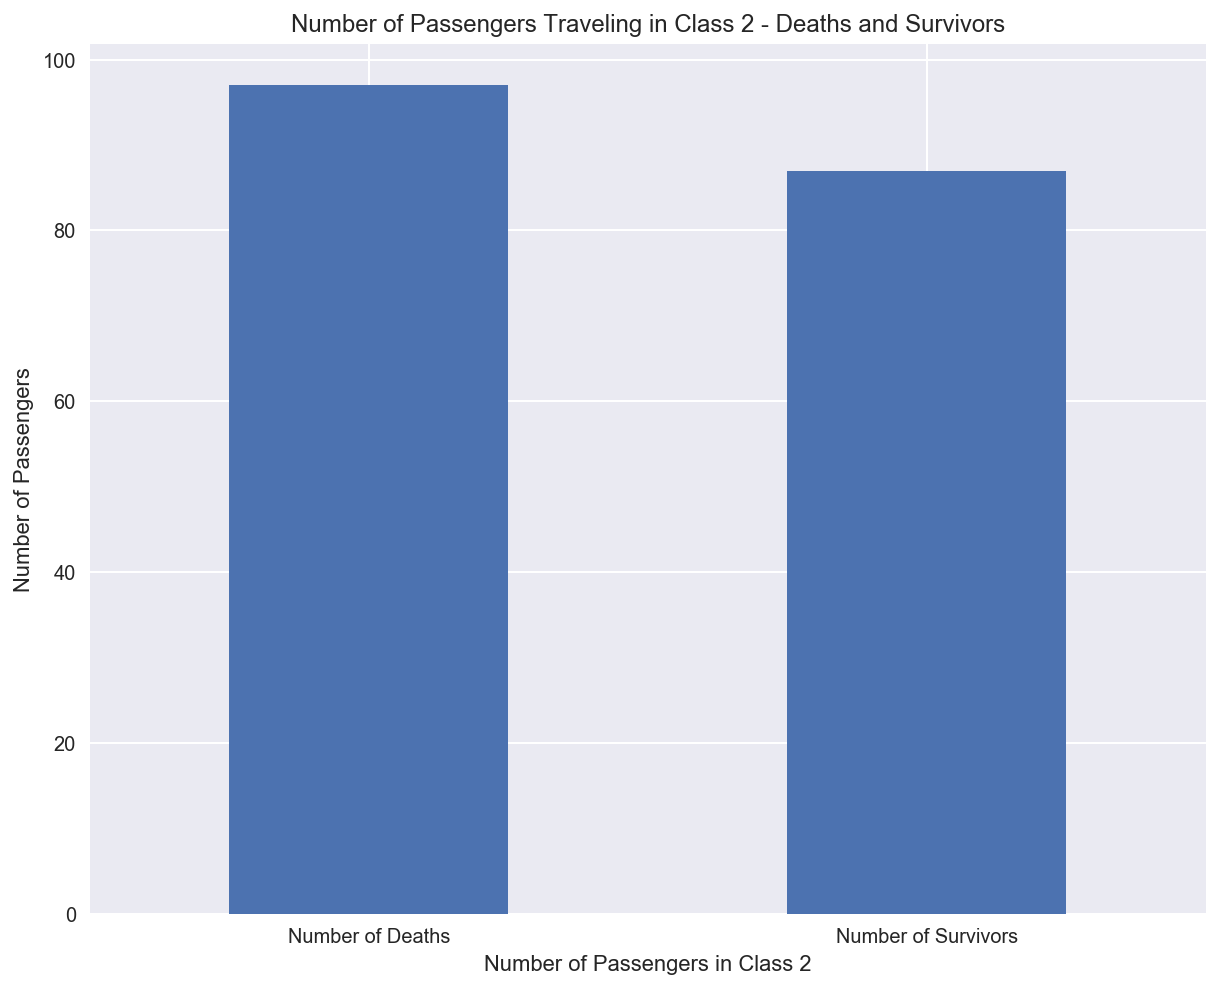

In [54]:
objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
class_survived[2].plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Class 2")
plt.title("Number of Passengers Traveling in Class 2 - Deaths and Survivors")
plt.show()

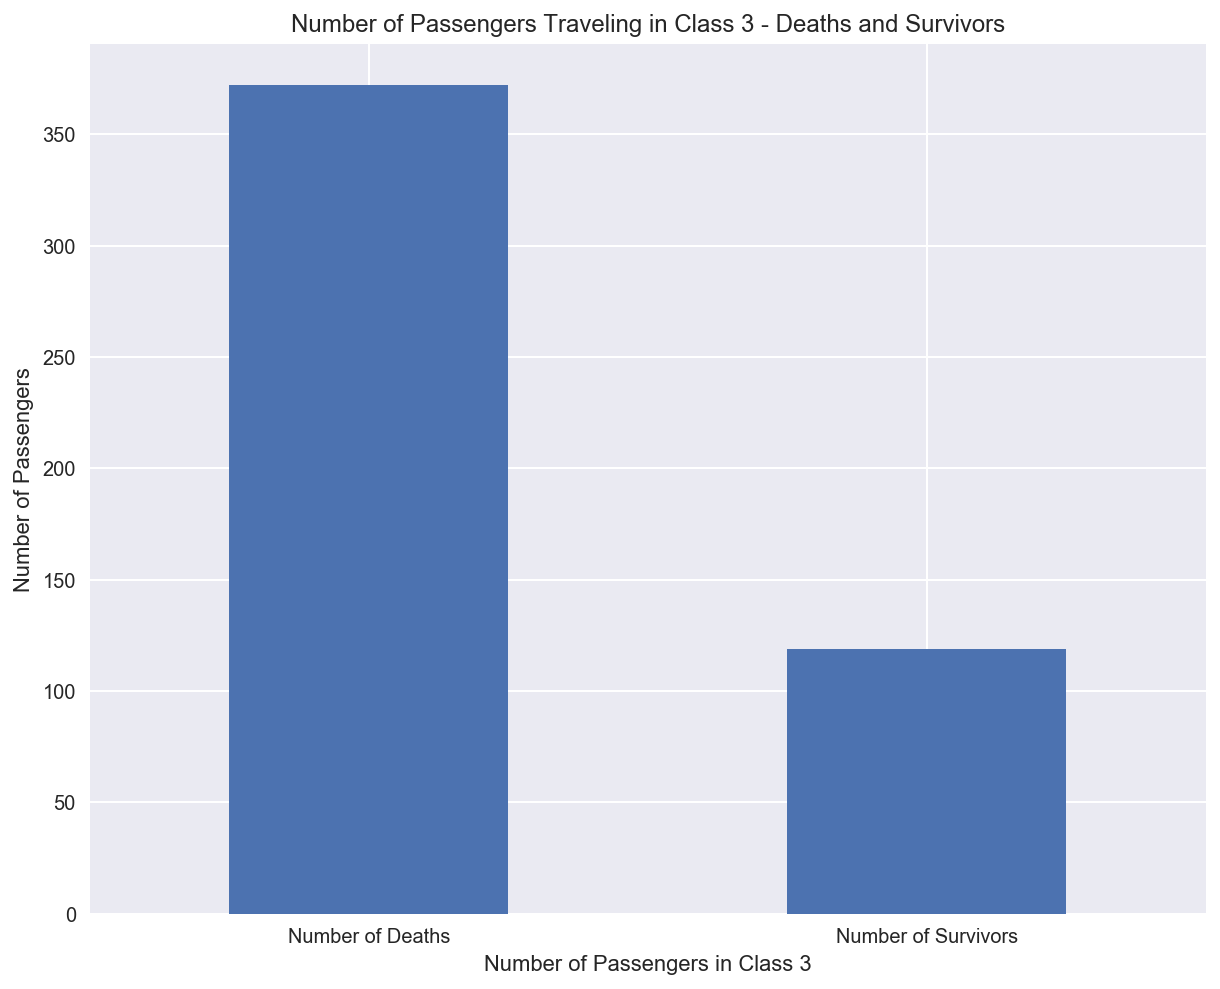

In [55]:
objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
class_survived[3].plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Class 3")
plt.title("Number of Passengers Traveling in Class 3 - Deaths and Survivors")
plt.show()

### Analysis - 

Class 1: 
Deaths - 37%
Survived - 63%

Class 2:
Deaths - 53%
Survived - 47%

Class 3:
Deaths - 76%
Survived - 24%

It can be analyzed that about 76% passengers have died from Class 3 and this percentage is much more than that the passenger deaths from Class 1 and Class 2.

### H] Distribution of Pclass and Cabin

In [56]:
pclass_cabin = main_file.groupby(("Pclass", "Cabin")).size()

In [57]:
pclass_cabin

Pclass  Cabin
1       A10      1
        A14      1
        A16      1
        A19      1
        A20      1
        A23      1
        A24      1
        A26      1
        A31      1
        A32      1
        A34      1
        A36      1
        A5       1
        A6       1
        A7       1
        B101     1
        B102     1
        B18      2
        B19      1
        B20      2
        B22      2
        B28      2
        B3       1
        B30      1
        B35      2
        B37      1
        B38      1
        B39      1
        B4       1
        B41      1
                ..
        E31      1
        E33      2
        E34      1
        E36      1
        E38      1
        E40      1
        E44      2
        E46      1
        E49      1
        E50      1
        E58      1
        E63      1
        E67      2
        E68      1
        E8       2
        T        1
2       D        3
        D56      1
        E101     3
        E77      1
        F2       

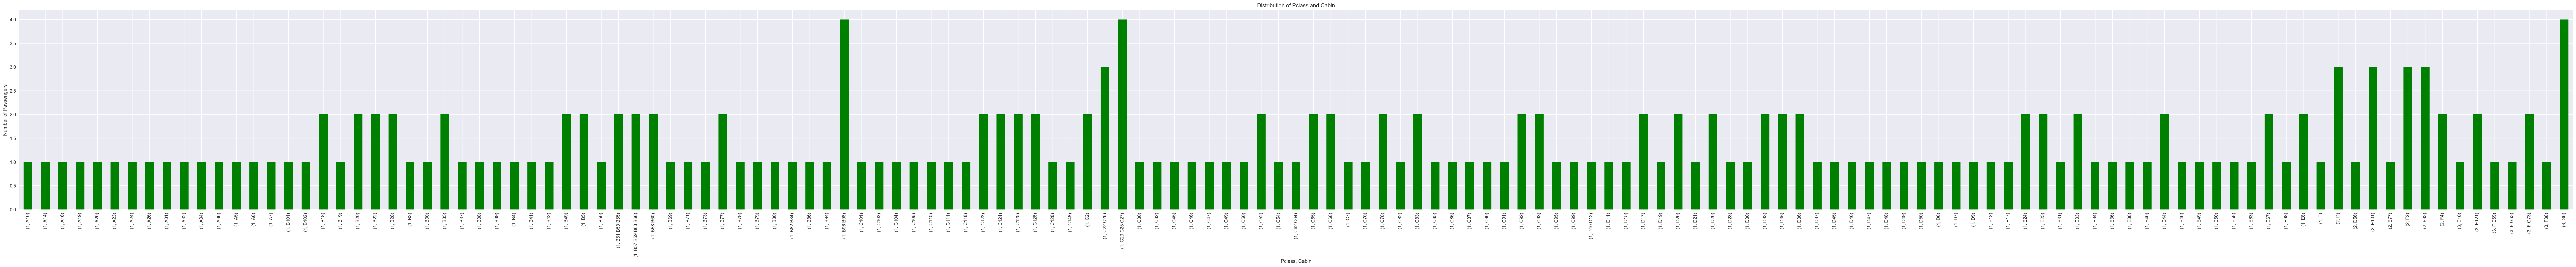

In [58]:
pclass_cabin.plot(kind = "bar", figsize = (100,8), color = 'g')
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass, Cabin")
plt.title("Distribution of Pclass and Cabin")
plt.show()

### I] Box Plot of Survivors from Pclass v/s Fare

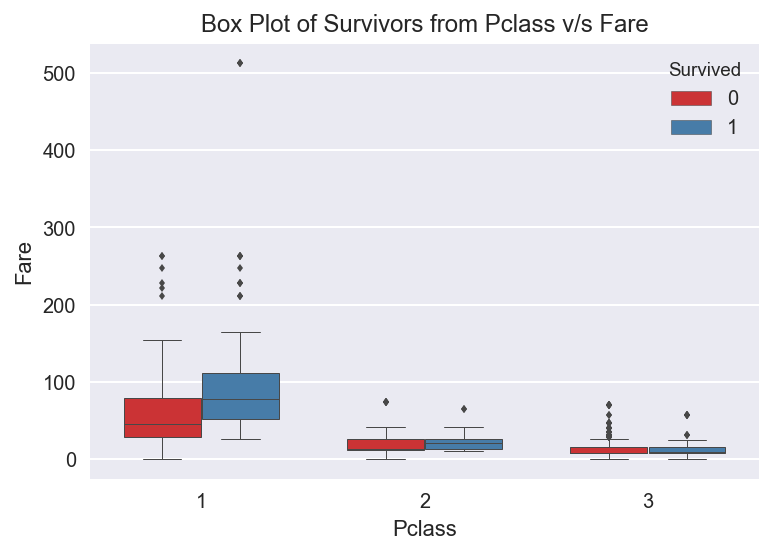

In [59]:
ax = sns.boxplot(x = "Pclass", y = "Fare", hue = "Survived", data = main_file, palette = "Set1", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5) 
plt.title("Box Plot of Survivors from Pclass v/s Fare")
sns.plt.show()

### Analysis - 

It can be analyzed that passengers who paid more fare and are from Pclass 3 have more survivors. 

### J] Distribution of Survivors with respect to Embarkment

In [60]:
embark_survived = main_file.groupby(("Embarked", "Survived")).size()

In [61]:
embark_survived

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

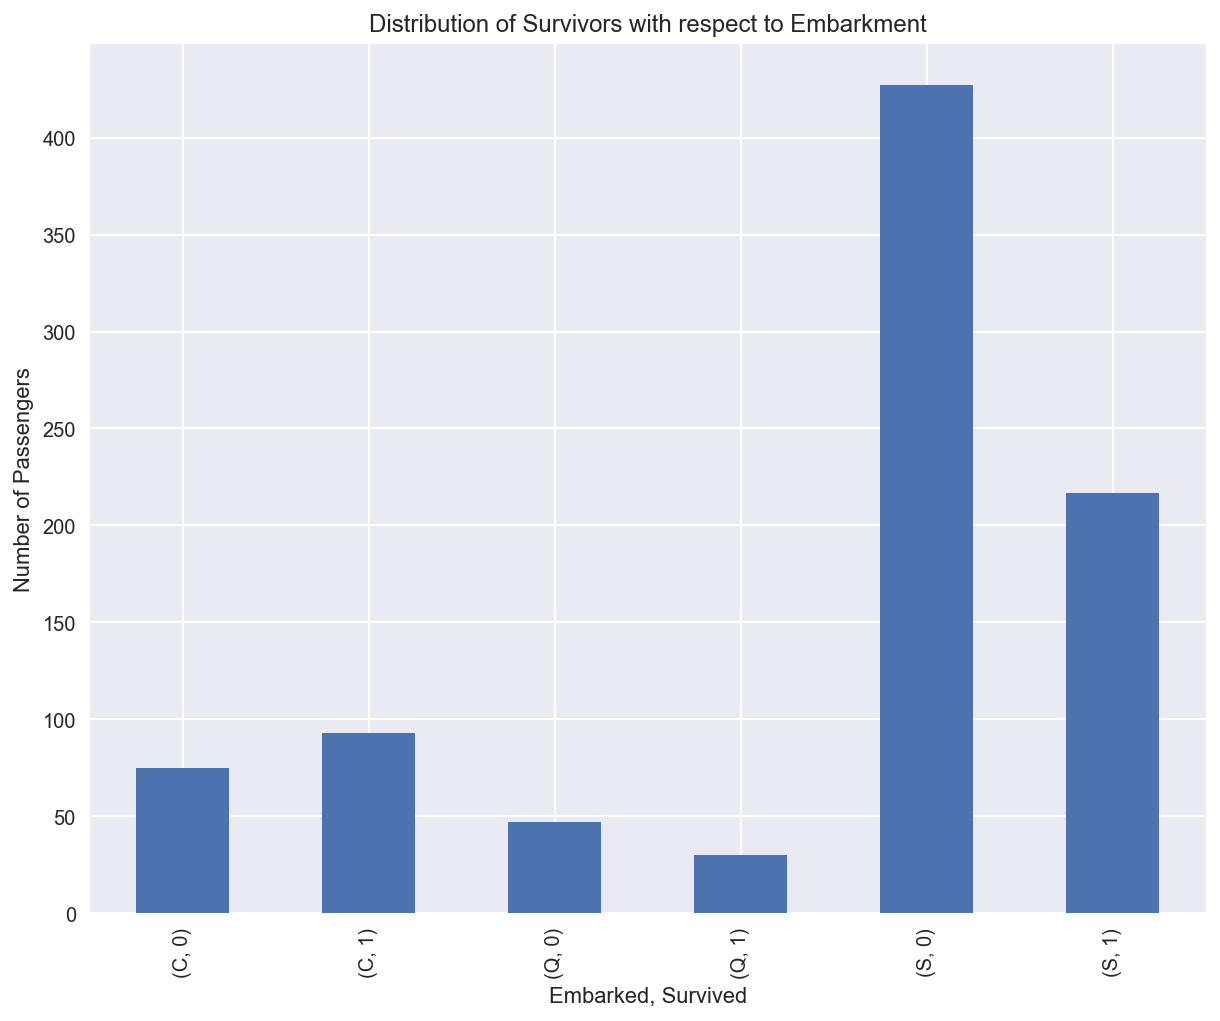

In [62]:
embark_survived.plot(kind = "bar", figsize = (10,8))
plt.ylabel("Number of Passengers")
plt.xlabel("Embarked, Survived")
plt.title("Distribution of Survivors with respect to Embarkment")
plt.show()

### Analysis - 

It can be analyzed that passengers who embarked from Port of Embarkment: C, have more percentage in survivors than compared to Q and S.

### K] Number of Passengers that Died and Survived with respect to the Fare

In [63]:
fare_survived = main_file.groupby(("Survived", "Fare")).size()

In [64]:
fare_survived

Survived  Fare    
0         0.0000      14
          4.0125       1
          5.0000       1
          6.2375       1
          6.4375       1
          6.4500       1
          6.4958       2
          6.7500       2
          6.8583       1
          6.9500       1
          6.9750       1
          7.0458       1
          7.0500       7
          7.0542       2
          7.1250       4
          7.2250       9
          7.2292      11
          7.2500      12
          7.3125       1
          7.4958       2
          7.5208       1
          7.5500       3
          7.6292       1
          7.6500       3
          7.7250       1
          7.7292       1
          7.7333       2
          7.7375       1
          7.7417       1
          7.7500      22
                      ..
1         79.2000      2
          79.6500      2
          80.0000      2
          81.8583      1
          82.1708      1
          83.1583      3
          83.4750      1
          86.5000      3
      

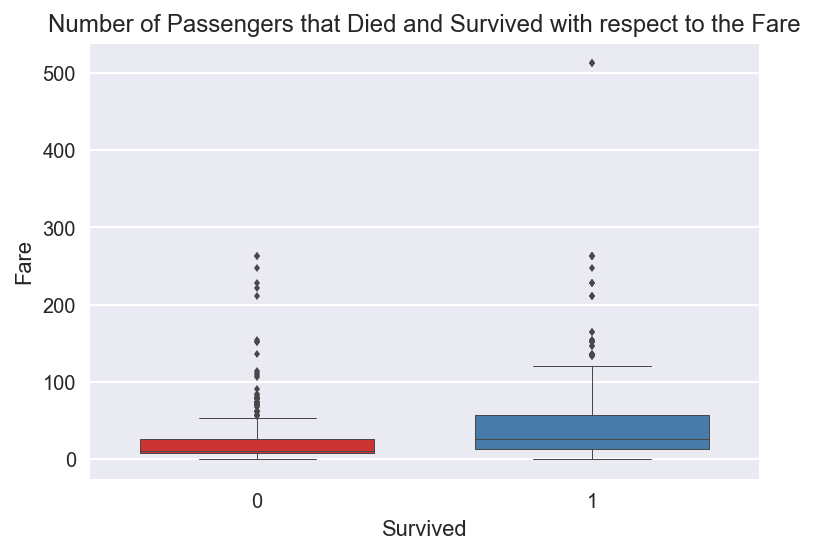

In [65]:
ax = sns.boxplot(x = "Survived", y = "Fare",data = main_file, palette = "Set1", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5) 
plt.title("Number of Passengers that Died and Survived with respect to the Fare")
sns.plt.show()

### Analysis - 

It can be analyzed that the percantge of survival is more for the passengers who paid higher fares.

## 5. Prediction Algorithms

### A] Make data appropriate for Training and Testing

In [66]:
# Only keep title from Name column
Title = []

for i in main_file["Name"]:
    Title.append(i.split(",")[1].split(".")[0])

In [67]:
main_file["Name"] = Title

In [68]:
main_file["Name"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
        ...   
861         Mr
862        Mrs
863       Miss
864         Mr
865        Mrs
866       Miss
867         Mr
868         Mr
869     Master
870         Mr
871        Mrs
872         Mr
873         Mr
874        Mrs
875       Miss
876         Mr
877         Mr
878         Mr
879        Mrs
880        Mrs
881         Mr
882       Miss
883         Mr
884         Mr
885        Mrs
886        Rev
887       Miss
888       Miss
889         Mr
890         Mr
Name: Name, Length: 891, dtype: object

In [69]:
# Delete columns that will not be necessary for prediction algorithms

In [70]:
del main_file["PassengerId"]

In [71]:
del main_file["Ticket"]

In [72]:
del main_file["Cabin"]

In [73]:
main_file.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [74]:
# Convert string values to int values for the ease of prediction
main_file = pd.get_dummies(main_file)

In [75]:
main_file.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_ Capt,Name_ Col,Name_ Don,Name_ Dr,...,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [76]:
# View data - ready for training and testing
pd.isnull(main_file).sum()

Survived              0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Name_ Capt            0
Name_ Col             0
Name_ Don             0
Name_ Dr              0
Name_ Jonkheer        0
Name_ Lady            0
Name_ Major           0
Name_ Master          0
Name_ Miss            0
Name_ Mlle            0
Name_ Mme             0
Name_ Mr              0
Name_ Mrs             0
Name_ Ms              0
Name_ Rev             0
Name_ Sir             0
Name_ the Countess    0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
dtype: int64

### B] Splitting up data into 80% train data and 20% test data

In [77]:
X = main_file.iloc[:,1:]
Y = main_file["Survived"]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [78]:
len(X_train)

712

In [79]:
len(X_test)

179

In [80]:
len(Y_train)

712

In [81]:
len(Y_test)

179

### C] Random Forest Classification Algorithm - Implementation and Results

In [82]:
# Random Forest Classification Algorithm applied to train data
RF = RandomForestClassifier(n_jobs = 2)
RF.fit(X_train, Y_train)
RF.score(X_train, Y_train)

0.973314606741573

In [83]:
# Predict Random Forest Algorithm on Test Data
predictions_RF = RF.predict(X_test)

In [84]:
# Print Accuracy Score for Random Forest Algorithm
print("Accuracy Score is: ")
print(accuracy_score(Y_test, predictions_RF))
print()

Accuracy Score is: 
0.810055865922



In [85]:
# Classification Report of Prediction
print("Classification Report: ")
print(classification_report(Y_test, predictions_RF))

Classification Report: 
             precision    recall  f1-score   support

          0       0.78      0.93      0.85       103
          1       0.88      0.64      0.74        76

avg / total       0.82      0.81      0.80       179



In [86]:
# Confusion Matrix for predictions made
conf = confusion_matrix(Y_test, predictions_RF)
conf

array([[96,  7],
       [27, 49]])

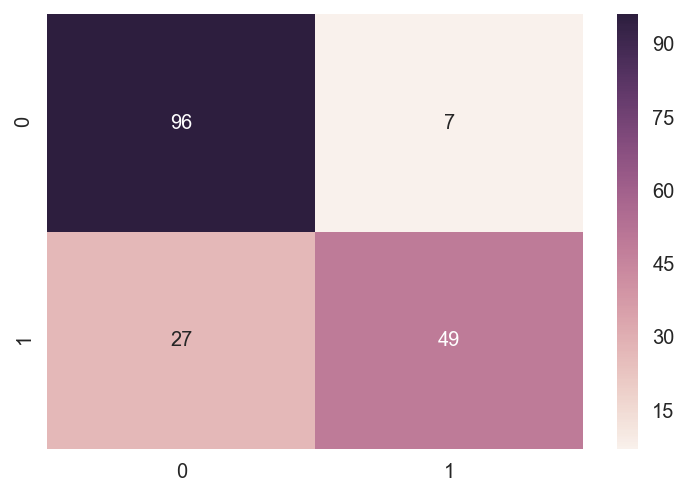

In [87]:
# Plot Confusion Matrix
label = ["0", "1"]
sns.heatmap(conf, annot = True, xticklabels = label, yticklabels = label)
plt.show()

Random Forest is useful for both Classification and Regression!

Also, it will create a multitude of (generally very poor) trees for the data set using different random subsets of the input variables, and will return whichever prediction was returned by the most trees. 


This helps to avoid “overfitting”, a problem that occurs when a model is so tightly fitted to arbitrary correlations in the training data that it performs poorly on test data.

### D] Linear Discrimination Analysis - Implementation and Results

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [89]:
# LDA applied to train data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [90]:
# Print Accuracy Score for LDA
print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_lda))
print()

Accuracy Score is:
0.843575418994



In [91]:
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(Y_test, predictions_lda))

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       103
          1       0.88      0.74      0.80        76

avg / total       0.85      0.84      0.84       179



In [92]:
# Confusion Matrix for predictions made
conf2 = confusion_matrix(Y_test,predictions_lda)
conf2

array([[95,  8],
       [20, 56]])

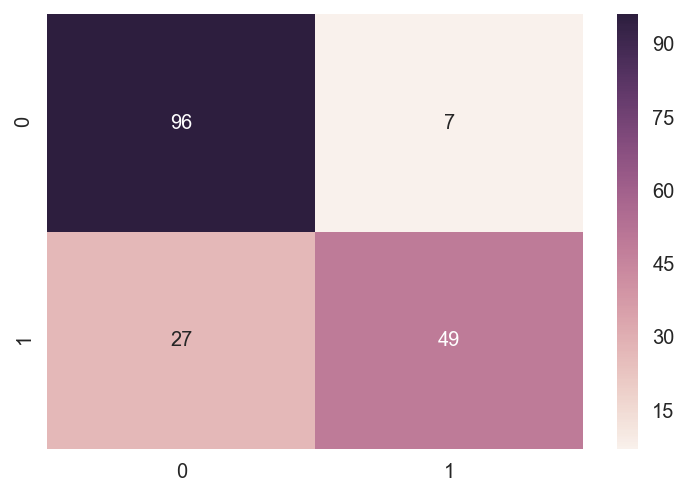

In [93]:
# Plot Confusion Matrix
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)

In the dataset we find that the independent variables are not normally distributed, which is the fundamental assumption while using LDA.

Moreover, by using LDA we find that it offers a better accuracy and recall, when compared to Random Forest.

## 6] Conclusion

Even though the data analysis, visualization and predictions have been done accurately, there still lies the limitation of the dataset. The difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected.